In [ ]:
import numpy as np from os 
import listdir 
import cv2 
import matplotlib.image as mpimg 
from tqdm import tqdm 
from skimage import feature as skif 
import sys from matplotlib 
import pyplot as plt

def lbp_histogram(image,P=8,R=1,method = 'nri_uniform'): ''' image: shape is N*M ''' 
    lbp = skif.local_binary_pattern(image, P,R, method) # lbp.shape is equal
    image.shape max_bins = int(lbp.max() + 1) # max_bins is related P 
    hist,_= np.histogram(lbp, normed=True, bins=max_bins, range=(0, max_bins)) 
    return hist

def get_features(image_path): 
    image = cv2.imread(image_path) 
    noisy_img, psnr = AWGN(image) 
    noisy_img = cv2.cvtColor(noisy_img, cv2.COLOR_BGR2YCrCb) 
    y_h = lbp_histogram(noisy_img[:,:,0]) # y channel 
    cb_h = lbp_histogram(noisy_img[:,:,1]) # cb channel 
    cr_h = lbp_histogram(noisy_img[:,:,2]) # cr channel 
    feature = np.append(np.concatenate((y_h,cb_h,cr_h)),np.array(psnr)) 
    return feature ''' image = cv2.imread(image_path) image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb) y_h = lbp_histogram(image[:,:,0]) # y channel cb_h = lbp_histogram(image[:,:,1]) # cb channel cr_h = lbp_histogram(image[:,:,2]) # cr channel feature = np.concatenate((y_h,cb_h,cr_h)) return feature'''

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0): # MSE is zero means no noise is present in the signal . # Therefore PSNR have no importance. 
        return 100 
    max_pixel = 255.0 
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

def AWGN(img): 
    height, width, channels = img.shape
    gauss = np.random.normal(0,1,img.size)
    gauss = gauss.reshape(height,width,channels).astype('uint8') # Add the Gaussian noise to the image
    img_gauss = cv2.add(img,gauss)
    return img_gauss, PSNR(img,img_gauss)

feature_label = [] #number of samples from each dataset
stop = 2000
path = ['D:/Dataset/StyleGAN/','D:/Dataset/FFHQ/']
#path = ['D:/Dataset/thispersondoesntexists_10K/', 'D:/Dataset/100KFake_10K/','D:/Dataset/Flickr-Faces-HQ_10K/', 'D:/Dataset/celebA-HQ_10K/']

labels = [1,0]

for z in range(2):
    folder = path[z]
    cont = 0
    for filename in tqdm(listdir(folder)):
        feature = get_features(folder+filename)
        feature_label.append(np.append(feature,np.array(labels[z])))
        cont+=1
        if cont >= stop:
            break

np.save('feature_StyleGAN+FFHQ_4k_lbp_method_WGN.npy',np.array(feature_label))

feature_label.clear()
stop = 1000
path = ['D:/Dataset/thispersondoesntexists_10K/', 'D:/Dataset/100KFake_10K/','D:/Dataset/Flickr-Faces-HQ_10K/', 'D:/Dataset/celebA-HQ_10K/']

labels = [1,1,0,0]

for z in range(4):
    folder = path[z]
    cont = 0 
    for filename in tqdm(listdir(folder)):
        feature = get_features(folder+filename)
        feature_label.append(np.append(feature,np.array(labels[z])))
        cont+=1
        if cont >= stop:
            break

np.save('feature_40Kfaces_4k_lbp_method_WGN.npy',np.array(feature_label))

In [4]:
import numpy as np
from os import listdir
import cv2
import matplotlib.image as mpimg
from tqdm import tqdm
from skimage import feature as skif
import sys
from matplotlib import pyplot as plt
#DF dataset
#feature_label.clear()
width = []
height = []
stop = 1600
path = ['D:/Dataset/prepro_deepFake/fake/','D:/Dataset/prepro_deepFake/real/']
labels = [1,0]
for z in range(2):
    cont = 0
    folder = path[z]
    for subdir, dirs, files in tqdm(os.walk(folder)):
        for file in files:        

            filename = os.path.join(subdir, file)
            image = cv2.imread(filename)
            height.append(image.shape[0])
            width.append(image.shape[1])
            #feature = get_features(filename)
            #feature_label.append(np.append(feature,np.array(labels[z])))
            cont+=1
            if cont >= stop:
                break
        if cont >= stop:
            break
#np.save('feature_DF_3200_lbp_method_WGN.npy',np.array(feature_label))

89it [00:06, 13.47it/s]
109it [00:06, 16.18it/s]


In [6]:
width_arr = np.asarray(width)
height_arr = np.asarray(height)
print(width_arr.mean(),'x',height_arr.mean())

259.0465625 x 262.019375


In [29]:
import numpy as np
from skimage import feature as skif
import cv2
def lbp_histogram(image,P=8,R=1,method = 'nri_uniform'):
    '''
    image: shape is N*M 
    '''
    lbp = skif.local_binary_pattern(image, P,R, method) # lbp.shape is equal image.shape
    # cv2.imwrite("lbp.png",lbp)
    max_bins = int(lbp.max() + 1) # max_bins is related P
    hist,_= np.histogram(lbp,  normed=True, bins=max_bins, range=(0, max_bins))
    return hist
# file_list is a txt file, like this:
# image_path label
def get_features(image_path):
    feature_label = []
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    y_h = lbp_histogram(image[:,:,0]) # y channel
    cb_h = lbp_histogram(image[:,:,1]) # cb channel
    cr_h = lbp_histogram(image[:,:,2]) # cr channel
    feature = np.concatenate((y_h,cb_h,cr_h))
    return feature

In [26]:
import numpy as np
from sklearn.metrics import confusion_matrix,roc_curve, auc
import matplotlib.pyplot as plt 
def metric(predict_proba,labels):
    predict =  np.greater(predict_proba[:,1],0.5)
    tn, fp, fn, tp = confusion_matrix(labels,predict).flatten()
    acc = (tp+tn)/(tp+tn+fp+fn)
    far = fp / (fp + tn) # apcer
    frr = fn / (tp + fn) # bpcer
    hter=(far+frr) / 2 # acer
    fpr, tpr, threshold = roc_curve(labels, predict_proba[:,1])
    auc_v = auc(fpr, tpr) # area under curve
    dist = abs((1-fpr) - tpr)
    eer = fpr[np.argmin(dist)]
    '''plt.plot(fpr, tpr, label='area under curve(auc): %0.2f' % auc_v)
    plt.plot([0, 1], [1, 0])
    plt.plot([eer, eer], [0,tpr[np.argmin(dist)]],label = '@EER',linestyle='--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend()
    plt.savefig("roc.png")'''
    return acc,eer,hter,far,frr,tp,fn,fp,tn

In [44]:
import numpy as np
from sklearn.svm import SVC
import joblib
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from random import randint

def load_feature_label(file_name):
    feature_label = np.load(file_name)
    return feature_label[:,:-1],feature_label[:,-1].astype(np.uint8)
'''    labels = []
    features = []
    for i in tqdm(range(feature_label.shape[0])):
        if feature_label[i].shape[0]!=178:
            continue
        features.append(np.array(feature_label[i][:177]))
        labels.append(feature_label[i][177].astype(np.uint8))
    return features, labels'''
acc_list = [randint(1, 10) for x in range(20)]
far_list = [randint(1, 10) for x in range(20)]
frr_list = [randint(1, 10) for x in range(20)]
eer_list = [randint(1, 10) for x in range(20)]
tp_list = [randint(1, 10) for x in range(20)]
fn_list = [randint(1, 10) for x in range(20)]
fp_list = [randint(1, 10) for x in range(20)]
tn_list = [randint(1, 10) for x in range(20)]

#train_feature,train_label = load_feature_label("feature_DF_3200_lbp_method_WGN.npy")

train_feature,train_label = load_feature_label("feature_60k(4K).npy")
'''train_feature = np.vstack((train_feature[:2000,:],train_feature[20000:22000,:]))
train_label = np.hstack((train_label[:2000],train_label[20000:22000]))'''
print(train_feature.shape)
print(train_label.shape)

for i in tqdm(range(0,20,2)):
    X_train, X_test, y_train, y_test = train_test_split(train_feature[:,:177], train_label, test_size = 0.2)#X
    model = SVC(kernel='rbf', C=1e3, gamma=0.5, class_weight='balanced', probability=True)
    model.fit(X_train, y_train)
    joblib.dump(model, "./model.m")
    predict_proba = model.predict_proba(X_train)
    predict = model.predict(X_train)
    acc,eer,hter,far_list[i],frr_list[i],tp_list[i],fn_list[i],fp_list[i],tn_list[i] = metric(predict_proba,y_train)
    acc_list[i]=acc
    eer_list[i]=eer
    #print("train acc is:%f eer is:%f hter is:%f"%(acc,eer,hter))
    model = joblib.load("./model.m")
    predict_proba = model.predict_proba(X_test)
    predict = model.predict(X_test)
    acc,eer,hter,far_list[i+1],frr_list[i+1],tp_list[i+1],fn_list[i+1],fp_list[i+1],tn_list[i+1] = metric(predict_proba,y_test)
    acc_list[i+1]=acc
    eer_list[i+1]=eer
    #print("test acc is:%f eer is:%f hter is:%f"%(acc,eer,hter))
print('Train values----------------------------------------------------------')
print('far = %0.5f' % np.mean(np.array(far_list[::2])))
print('frr = %0.5f' % np.mean(np.array(frr_list[::2])))
print('eer = %0.5f' % np.mean(np.array(eer_list[::2])))
print('tp = %0.1f' % np.mean(np.array(tp_list[::2])))
print('fn = %0.1f' % np.mean(np.array(fn_list[::2])))
print('fp = %0.1f' % np.mean(np.array(fp_list[::2])))
print('tn = %0.1f' % np.mean(np.array(tn_list[::2])))
print('acc = %0.5f' % np.mean(np.array(acc_list[::2])))
print('Test values----------------------------------------------------------')
print('far = %0.5f' % np.mean(np.array(far_list[1::2])))
print('frr = %0.5f' % np.mean(np.array(frr_list[1::2])))
print('eer = %0.5f' % np.mean(np.array(eer_list[1::2])))
print('tp = %0.1f' % np.mean(np.array(tp_list[1::2])))
print('fn = %0.1f' % np.mean(np.array(fn_list[1::2])))
print('fp = %0.1f' % np.mean(np.array(fp_list[1::2])))
print('tn = %0.1f' % np.mean(np.array(tn_list[1::2])))
print('acc = %0.5f' % np.mean(np.array(acc_list[1::2])))

(4000, 177)
(4000,)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:06<00:00,  1.62it/s]

Train values----------------------------------------------------------
far = 0.00238
frr = 0.00006
eer = 0.00063
tp = 1601.3
fn = 0.1
fp = 3.8
tn = 1594.8
acc = 0.99878
Test values----------------------------------------------------------
far = 0.00377
frr = 0.00199
eer = 0.00299
tp = 397.8
fn = 0.8
fp = 1.5
tn = 399.9
acc = 0.99713


In [39]:
sum = 0
for i in range(train_feature.shape[0]):
    sum +=train_feature[i][177]
sum/=train_feature.shape[0]
print(sum)

35.86963847698287


FAR =  0.014925373134328358
FRR =  0.020100502512562814
fp =  6
tn =  396
fn =  8
tp =  390
test acc is:0.982500 eer is:0.017413 hter is:0.017513


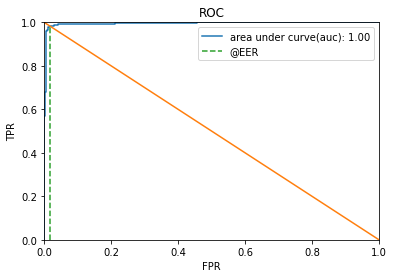

In [17]:
model = joblib.load("./model.m")
predict_proba = model.predict_proba(X_test)
predict = model.predict(X_test)
acc,eer,hter = metric(predict_proba,y_test)
print("test acc is:%f eer is:%f hter is:%f"%(acc,eer,hter))

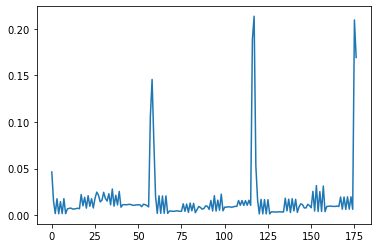

In [36]:
from matplotlib import pyplot as plt
plt.plot(X_train[0,:])

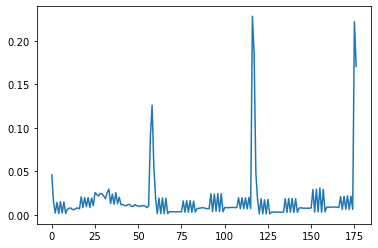

In [37]:
plt.plot(X_train[801,:])

1.0


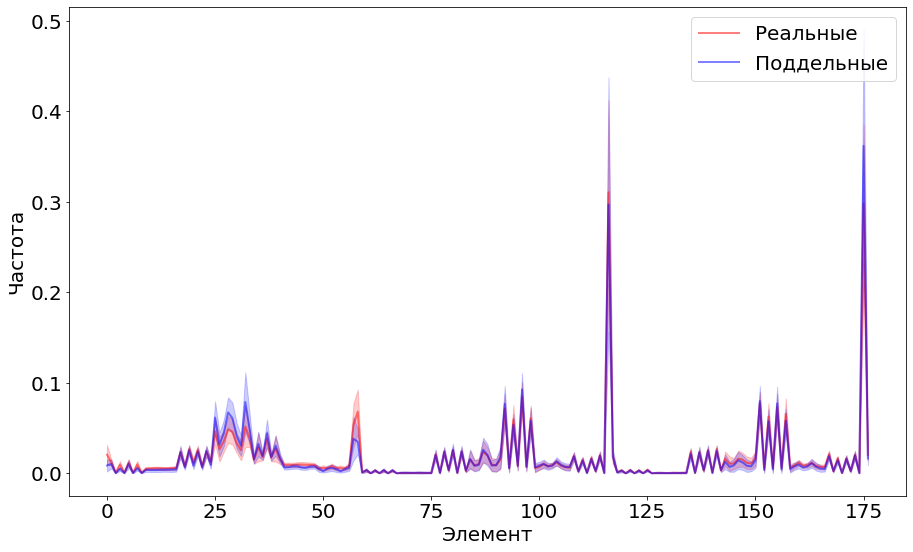

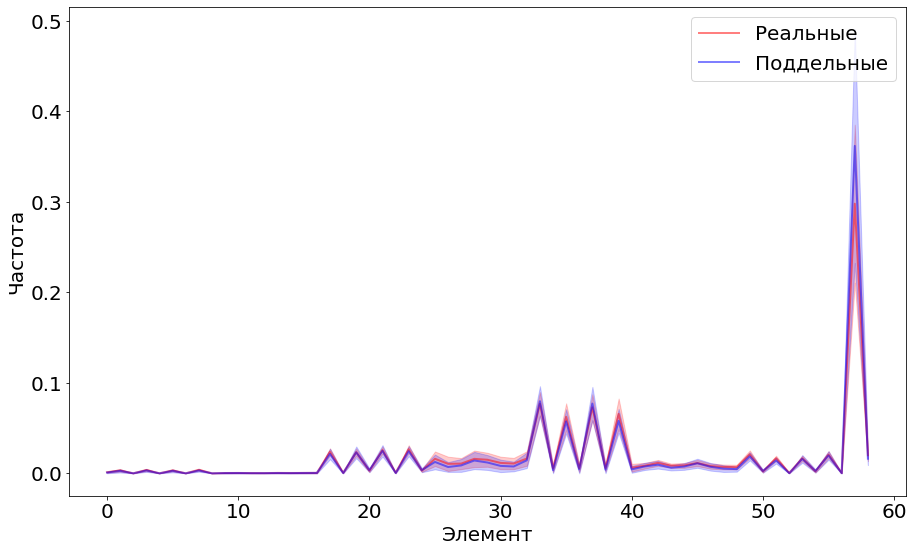

In [168]:
plotSpectrum(train_feature,train_label)
plotSpectrum(train_feature[:,118:177],train_label)
print(np.sum(train_feature[0,59:118]))

In [167]:
def plotSpectrum(X,y):
    num = int(X.shape[0]/2)
    num_feat = X.shape[1]

    psd1D_org_0 = np.zeros((num,num_feat))
    psd1D_org_1 = np.zeros((num,num_feat))
    psd1D_org_0_mean = np.zeros(num_feat)
    psd1D_org_0_std = np.zeros(num_feat)
    psd1D_org_1_mean = np.zeros(num_feat)
    psd1D_org_1_std = np.zeros(num_feat)

    cont_0=0
    cont_1=0

    # We separate real and fake using the label
    for x in range(X.shape[0]):
        if y[x]==0:
            psd1D_org_0[cont_0,:] = X[x,:]
            cont_0+=1
        elif y[x]==1:
            psd1D_org_1[cont_1,:] = X[x,:]
            cont_1+=1

    # We compute statistcis
    for x in range(num_feat):
        psd1D_org_0_mean[x] = np.mean(psd1D_org_0[:,x])
        psd1D_org_0_std[x]= np.std(psd1D_org_0[:,x])
        #psd1D_org_0_min[x]= np.min(psd1D_org_0[:,x])
        #psd1D_org_0_max[x]= np.max(psd1D_org_0[:,x])
        psd1D_org_1_mean[x] = np.mean(psd1D_org_1[:,x])
        #psd1D_org_1_min[x] = np.min(psd1D_org_1[:,x])
        #psd1D_org_1_max[x] = np.max(psd1D_org_1[:,x])
        psd1D_org_1_std[x]= np.std(psd1D_org_1[:,x])

    # Plot
    x = np.arange(0, num_feat, 1)
    fig, ax = plt.subplots(figsize=(15, 9))
    ax.plot(x, psd1D_org_0_mean, alpha=0.5, color='red', label='Реальные', linewidth =2.0)
    ax.fill_between(x, psd1D_org_0_mean - psd1D_org_0_std, psd1D_org_0_mean + psd1D_org_0_std, color='red', alpha=0.2)
    ax.plot(x, psd1D_org_1_mean, alpha=0.5, color='blue', label='Поддельные', linewidth =2.0)
    ax.fill_between(x, psd1D_org_1_mean - psd1D_org_1_std, psd1D_org_1_mean + psd1D_org_1_std, color='blue', alpha=0.2)
    ax.legend()
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    ax.legend(loc='best', prop={'size': 20})
    plt.xlabel("Элемент", fontsize=20)
    plt.ylabel("Частота", fontsize=20)

In [14]:
X_train.shape

NameError: name 'X_train' is not defined

  0%|                                                                                        | 0/30000 [00:00<?, ?it/s]

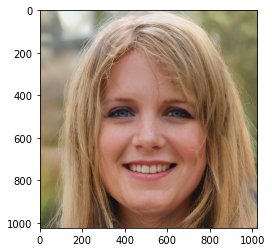

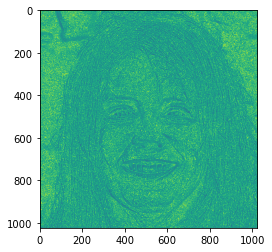

C:\Users\ACA8~1\AppData\Local\Temp/ipykernel_20220/4280748337.py:19: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist,_= np.histogram(lbp,  normed=True, bins=max_bins, range=(0, max_bins))


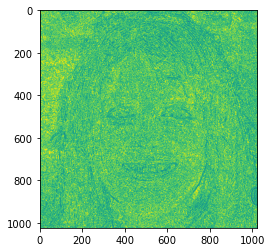

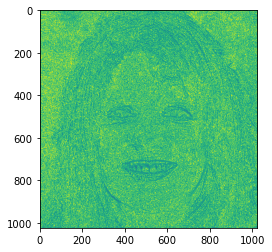

  0%|                                                                                        | 0/30000 [00:01<?, ?it/s]


In [1]:
import numpy as np
from skimage import feature as skif
import cv2
from os import listdir
import matplotlib.image as mpimg
from tqdm import tqdm
import sys
from matplotlib import pyplot as plt

def lbp_histogram(image,P=8,R=1,method = 'nri_uniform'):
    '''
    image: shape is N*M 
    '''
    lbp = skif.local_binary_pattern(image, P,R, method) # lbp.shape is equal image.shape
    # cv2.imwrite("lbp.png",lbp)
    max_bins = int(lbp.max() + 1) # max_bins is related P
    hist,_= np.histogram(lbp,  normed=True, bins=max_bins, range=(0, max_bins))
    return hist
# file_list is a txt file, like this:
# image_path label
def get_features(image_path):
    feature_label = []
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    y_h = lbp_histogram(image[:,:,0]) # y channel
    cb_h = lbp_histogram(image[:,:,1]) # cb channel
    cr_h = lbp_histogram(image[:,:,2]) # cr channel
    feature = np.concatenate((y_h,cb_h,cr_h))
    return feature

folder = 'D:/Dataset/StyleGAN/'
label = 1
cont_fake = 0
for filename in tqdm(listdir(folder)):
    cont_fake+=1
    feature = get_features(folder+filename)
    if cont_fake >= 1:
        break

In [29]:
import numpy as np

def azimuthalAverage(image, center=None):
    """
    Calculate the azimuthally averaged radial profile.
    image - The 2D image
    center - The [x,y] pixel coordinates used as the center. The default is 
             None, which then uses the center of the image (including 
             fracitonal pixels).
    
    """
    # Calculate the indices from the image
    y, x = np.indices(image.shape)

    if not center:
        center = np.array([(x.max()-x.min())/2.0, (y.max()-y.min())/2.0])

    r = np.hypot(x - center[0], y - center[1])

    # Get sorted radii
    ind = np.argsort(r.flat)
    r_sorted = r.flat[ind]
    i_sorted = image.flat[ind]

    # Get the integer part of the radii (bin size = 1)
    r_int = r_sorted.astype(int)

    # Find all pixels that fall within each radial bin.
    deltar = r_int[1:] - r_int[:-1]  # Assumes all radii represented
    rind = np.where(deltar)[0]       # location of changed radius
    nr = rind[1:] - rind[:-1]        # number of radius bin
    
    # Cumulative sum to figure out sums for each radius bin
    csim = np.cumsum(i_sorted, dtype=float)
    tbin = csim[rind[1:]] - csim[rind[:-1]]

    radial_prof = tbin / nr

    return radial_prof

In [30]:
import cv2
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
import pickle
from tqdm import tqdm
from scipy.interpolate import griddata
from math import log10, sqrt
from os import listdir
import matplotlib.image as mpimg


def lbp_histogram(image,P=8,R=1,method = 'nri_uniform'):
    '''
    image: shape is N*M 
    '''
    lbp = skif.local_binary_pattern(image, P,R, method) # lbp.shape is equal image.shape
    # cv2.imwrite("lbp.png",lbp)
    max_bins = int(lbp.max() + 1) # max_bins is related P
    hist,_= np.histogram(lbp,  normed=True, bins=max_bins, range=(0, max_bins))
    return hist

def get_features(image):
    feature_label = []
    image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    y_h = lbp_histogram(image[:,:,0]) # y channel
    cb_h = lbp_histogram(image[:,:,1]) # cb channel
    cr_h = lbp_histogram(image[:,:,2]) # cr channel
    feature = np.concatenate((y_h,cb_h,cr_h))
    return feature

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def AWGN(img):
    height, width, channels = img.shape
    gauss = np.random.normal(0,1,img.size)
    gauss = gauss.reshape(height,width,channels).astype('uint8')
    # Add the Gaussian noise to the image
    img_gauss = cv2.add(img,gauss)
    return img_gauss, PSNR(img,img_gauss)

def get2DSpectrum(file):
    epsilon = 1e-8
    img = mpimg.imread(file)
    gauss, psnr = AWGN(img)
    R, G, B = gauss[:,:,0], gauss[:,:,1], gauss[:,:,2]
    imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
    f = np.fft.fft2(imgGray)
    fshift = np.fft.fftshift(f)
    fshift+=epsilon
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    return magnitude_spectrum, psnr


number_iter = 1600
N = 300
psd1D_total = np.zeros([number_iter*2, N])
label_total = np.zeros([number_iter*2])
psnr_total = np.zeros([number_iter*2])
data={}
cont = 0
epsilon = 1e-8
iter_=0
#fake data
path = ['D:/Dataset/prepro_deepFake/fake/','D:/Dataset/prepro_deepFake/real/']

labels = [1,0]
for z in range(2):
    cont = 0
    for subdir, dirs, files in tqdm(os.walk(path[z])):
        for file in files:        

            filename = os.path.join(subdir, file)

            img = cv2.imread(filename)

            # we crop the center
            h = int(img.shape[0]/3)
            w = int(img.shape[1]/3)
            img = img[h:-h,w:-w]
            gauss, psnr_total[iter_] = AWGN(img)
            #feature = get_features(img)
            #feature_label.append(np.append(feature,np.array(label)))
            #R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
            R, G, B = gauss[:,:,0], gauss[:,:,1], gauss[:,:,2]
            imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
            f = np.fft.fft2(imgGray)
            fshift = np.fft.fftshift(f)
            fshift += epsilon
            magnitude_spectrum = 20*np.log(np.abs(fshift))

            # Calculate the azimuthally averaged 1D power spectrum
            psd1D = azimuthalAverage(magnitude_spectrum)

            points = np.linspace(0,N,num=psd1D.size) # coordinates of a
            xi = np.linspace(0,N,num=N) # coordinates for interpolation

            interpolated = griddata(points,psd1D,xi,method='cubic')
            interpolated /= interpolated[0]

            psd1D_total[iter_,:] = interpolated         
            label_total[iter_] = labels[z]
            cont+=1
            iter_+=1
            if cont == number_iter:
                break
        if cont == number_iter:
            break

              
data["data"] = psd1D_total
data["label"] = label_total
data["psnr"] = psnr_total
output = open('DF_feature_3200_psd1D_WGN.pkl', 'wb')
pickle.dump(data, output)
output.close()

path = ['D:/Dataset/thispersondoesntexists_10K/', 'D:/Dataset/100KFake_10K/','D:/Dataset/Flickr-Faces-HQ_10K/', 'D:/Dataset/celebA-HQ_10K/']
names = ['thispersondoesntexists','100KFake','Flickr-Faces-HQ','celebA-HQ']
labels = [1,1,0,0]

#number of samples from each dataset
stop = 10000
iter_= 0
data={}
psd1D_total = np.zeros([stop*4, 722])
label_total = np.zeros([stop*4])
psnr_total = np.zeros([stop*4])

for z in range(4):
    cont = 0
    for filename in tqdm(listdir(path[z])):
        spectrum, psnr_total[iter_] = get2DSpectrum(path[z]+filename)
        psd1D_total[iter_,:] = azimuthalAverage(spectrum)
        label_total[iter_] = labels[z]
        iter_+=1
        cont+=1
        if cont >= stop:
            break
    print(f"{names[z]} done")

data["data"] = psd1D_total
data["label"] = label_total
data["psnr"] = psnr_total
output = open('psd1D_40Kfaces_WGN.pkl', 'wb')
pickle.dump(data, output)
output.close()


path = ['D:/Dataset/StyleGAN/','D:/Dataset/FFHQ/']
names = ['StyleGAN','FFHQ']
labels = [1,0]

#number of samples from each dataset
stop = 30000
iter_= 0
data={}
psd1D_total = np.zeros([stop*2, 722])
label_total = np.zeros([stop*2])
psnr_total = np.zeros([stop*2])
for z in range(2):
    cont = 0
    for filename in tqdm(listdir(path[z])):
        spectrum, psnr_total[iter_] = get2DSpectrum(path[z]+filename)
        psd1D_total[iter_,:] = azimuthalAverage(spectrum)
        label_total[iter_] = labels[z]
        iter_+=1
        cont+=1
        if cont >= stop:
            break
    print(f"{names[z]} done")

data["data"] = psd1D_total
data["label"] = label_total
data["psnr"] = psnr_total
output = open('psd1D_StyleGAN+FFHQ_WGN.pkl', 'wb')
pickle.dump(data, output)
output.close()

89it [00:10,  8.75it/s]
109it [00:11,  9.82it/s]
100%|██████████████████████████████████████████████████████████████████████████▉| 9999/10000 [1:02:26<00:00,  2.67it/s]


thispersondoesntexists done


100%|████████████████████████████████████████████████████████████████████████████▉| 9999/10000 [55:42<00:00,  2.99it/s]


100KFake done


100%|████████████████████████████████████████████████████████████████████████████▉| 9999/10000 [54:04<00:00,  3.08it/s]


Flickr-Faces-HQ done


100%|████████████████████████████████████████████████████████████████████████████▉| 9999/10000 [53:57<00:00,  3.09it/s]


celebA-HQ done


  0%|                                                                                        | 0/30000 [00:00<?, ?it/s]


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:674: error: (-5:Bad argument) When the input arrays in add/subtract/multiply/divide functions have different types, the output array type must be explicitly specified in function 'cv::arithm_op'


In [32]:
def get2DSpectrum(file):
    epsilon = 1e-8
    img = cv2.imread(file)
    gauss, psnr = AWGN(img)
    R, G, B = gauss[:,:,0], gauss[:,:,1], gauss[:,:,2]
    imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
    f = np.fft.fft2(imgGray)
    fshift = np.fft.fftshift(f)
    fshift+=epsilon
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    return magnitude_spectrum, psnr

#number of samples from each dataset
stop = 30000
iter_= 0
data={}
psd1D_total = np.zeros([stop*2, 722])
label_total = np.zeros([stop*2])
psnr_total = np.zeros([stop*2])
for z in range(2):
    cont = 0
    for filename in tqdm(listdir(path[z])):
        spectrum, psnr_total[iter_] = get2DSpectrum(path[z]+filename)
        psd1D_total[iter_,:] = azimuthalAverage(spectrum)
        label_total[iter_] = labels[z]
        iter_+=1
        cont+=1
        if cont >= stop:
            break
    print(f"{names[z]} done")

data["data"] = psd1D_total
data["label"] = label_total
data["psnr"] = psnr_total
output = open('psd1D_StyleGAN+FFHQ_WGN.pkl', 'wb')
pickle.dump(data, output)
output.close()

100%|█████████████████████████████████████████████████████████████████████████▉| 29999/30000 [2:50:12<00:00,  2.94it/s]


StyleGAN done


100%|█████████████████████████████████████████████████████████████████████████▉| 29999/30000 [2:51:07<00:00,  2.92it/s]


FFHQ done


In [11]:
def load_feature_label(file_name):
    feature_label = np.load(file_name)
    return feature_label[:,:-1],feature_label[:,-1].astype(np.uint8)

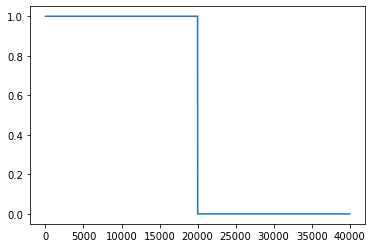

In [7]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
pkl_file = open('psd1D_40K.pkl', 'rb')
data = pickle.load(pkl_file)
pkl_file.close()
X = data["data"]
y = data["label"]
plt.plot(y)

In [6]:
X = np.vstack((X[:2000,:],X[30000:32000,:]))
print(X.shape)
y = np.hstack((y[:2000],y[30000:32000]))
print(y.shape)

(4000, 722)
(4000,)


In [39]:
import numpy as np
from sklearn.svm import SVC
import joblib
from sklearn.model_selection import train_test_split
from random import randint
import pickle
from tqdm import tqdm

acc_list = [randint(1, 10) for x in range(20)]
far_list = [randint(1, 10) for x in range(20)]
frr_list = [randint(1, 10) for x in range(20)]
eer_list = [randint(1, 10) for x in range(20)]
tp_list = [randint(1, 10) for x in range(20)]
fn_list = [randint(1, 10) for x in range(20)]
fp_list = [randint(1, 10) for x in range(20)]
tn_list = [randint(1, 10) for x in range(20)]
#train_feature,train_label = load_feature_label("test_feature.npy")
for i in tqdm(range(0,20,2)):
    pkl_file = open('dataset_psd1D_60000.pkl', 'rb')#DF_feature_3200_psd1D_WGN.pkl
    data = pickle.load(pkl_file)
    pkl_file.close()
    X = data["data"]
    y = data["label"]
    #X = np.vstack((X[i//2*1000:1000+i//2*1000,:],X[10000+i//2*1000:11000+i//2*1000,:],X[20000+i//2*1000:21000+i//2*1000,:],X[30000+i//2*1000:31000+i//2*1000,:]))
    #y = np.hstack((y[i//2*1000:1000+i//2*1000],y[10000+i//2*1000:11000+i//2*1000],y[20000+i//2*1000:21000+i//2*1000],y[30000+i//2*1000:31000+i//2*1000]))
    X = np.vstack((X[i*1000:2000+i*1000,:],X[30000+i*1000:32000+i*1000,:]))
    y = np.hstack((y[i*1000:2000+i*1000],y[30000+i*1000:32000+i*1000]))
    #print(i//2*1000,1000+i//2*1000)
    print(i*1000,2000+i*1000)
    print(X.shape, y.shape)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)#train_test_split(train_feature, train_label, test_size = 0.2)#X
    model = SVC(kernel='linear', C=1e3, gamma=0.5, class_weight='balanced', probability=True)
    #model = SVC(kernel='linear', probability=True)
    model.fit(X_train, y_train)
    joblib.dump(model, "./model2.m")
    predict_proba = model.predict_proba(X_train)
    predict = model.predict(X_train)
    acc,eer,hter,far_list[i],frr_list[i],tp_list[i],fn_list[i],fp_list[i],tn_list[i] = metric(predict_proba,y_train)
    acc_list[i]=acc
    eer_list[i]=eer
    model = joblib.load("./model2.m")
    predict_proba = model.predict_proba(X_test)
    predict = model.predict(X_test)
    acc,eer,hter,far_list[i+1],frr_list[i+1],tp_list[i+1],fn_list[i+1],fp_list[i+1],tn_list[i+1] = metric(predict_proba,y_test)
    acc_list[i+1]=acc
    eer_list[i+1]=eer
    #print("train acc is:%f eer is:%f hter is:%f"%(acc,eer,hter))
print('Train values----------------------------------------------------------')
print('far = %0.5f' % np.mean(np.array(far_list[::2])))
print('frr = %0.5f' % np.mean(np.array(frr_list[::2])))
print('eer = %0.5f' % np.mean(np.array(eer_list[::2])))
print('tp = %0.1f' % np.mean(np.array(tp_list[::2])))
print('fn = %0.1f' % np.mean(np.array(fn_list[::2])))
print('fp = %0.1f' % np.mean(np.array(fp_list[::2])))
print('tn = %0.1f' % np.mean(np.array(tn_list[::2])))
print('acc = %0.5f' % np.mean(np.array(acc_list[::2])))
print('Test values----------------------------------------------------------')
print('far = %0.5f' % np.mean(np.array(far_list[1::2])))
print('frr = %0.5f' % np.mean(np.array(frr_list[1::2])))
print('eer = %0.5f' % np.mean(np.array(eer_list[1::2])))
print('tp = %0.1f' % np.mean(np.array(tp_list[1::2])))
print('fn = %0.1f' % np.mean(np.array(fn_list[1::2])))
print('fp = %0.1f' % np.mean(np.array(fp_list[1::2])))
print('tn = %0.1f' % np.mean(np.array(tn_list[1::2])))
print('acc = %0.5f' % np.mean(np.array(acc_list[1::2])))

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

0 2000
(4000, 722) (4000,)


 10%|████████▎                                                                          | 1/10 [00:00<00:05,  1.58it/s]

2000 4000
(4000, 722) (4000,)


 20%|████████████████▌                                                                  | 2/10 [00:01<00:04,  1.69it/s]

4000 6000
(4000, 722) (4000,)


 30%|████████████████████████▉                                                          | 3/10 [00:02<00:04,  1.44it/s]

6000 8000
(4000, 722) (4000,)


 40%|█████████████████████████████████▏                                                 | 4/10 [00:02<00:03,  1.58it/s]

8000 10000
(4000, 722) (4000,)


 50%|█████████████████████████████████████████▌                                         | 5/10 [00:03<00:03,  1.59it/s]

10000 12000
(4000, 722) (4000,)


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:03<00:02,  1.72it/s]

12000 14000
(4000, 722) (4000,)


 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:04<00:01,  1.78it/s]

14000 16000
(4000, 722) (4000,)


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:04<00:01,  1.68it/s]

16000 18000
(4000, 722) (4000,)


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:05<00:00,  1.71it/s]

18000 20000
(4000, 722) (4000,)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.68it/s]

Train values----------------------------------------------------------
far = 0.00000
frr = 0.00000
eer = 0.00000
tp = 1594.8
fn = 0.0
fp = 0.0
tn = 1605.2
acc = 1.00000
Test values----------------------------------------------------------
far = 0.00050
frr = 0.00000
eer = 0.00000
tp = 405.2
fn = 0.0
fp = 0.2
tn = 394.6
acc = 0.99975


In [49]:
print(np.sum(y_train))
print(np.sum(y_test))

16008.0
3992.0


In [ ]:
model = joblib.load("./model2.m")
predict_proba = model.predict_proba(X_test)
predict = model.predict(X_test)
acc,eer,hter = metric(predict_proba,y_test)
print("test acc is:%f eer is:%f hter is:%f"%(acc,eer,hter))

In [9]:
import cv2
import numpy as np
import os
from os import listdir
from tqdm import tqdm
from skimage import feature as skif


def lbp_histogram(image,P=8,R=1,method = 'nri_uniform'):
    '''
    image: shape is N*M 
    '''
    lbp = skif.local_binary_pattern(image, P,R, method) # lbp.shape is equal image.shape
    # cv2.imwrite("lbp.png",lbp)
    max_bins = int(lbp.max() + 1) # max_bins is related P
    hist,_= np.histogram(lbp,  normed=True, bins=max_bins, range=(0, max_bins))
    return hist

def get_features(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    y_h = lbp_histogram(image[:,:,0]) # y channel
    cb_h = lbp_histogram(image[:,:,1]) # cb channel
    cr_h = lbp_histogram(image[:,:,2]) # cr channel
    feature = np.concatenate((y_h,cb_h,cr_h))
    return feature


path = ['D:/Dataset/thispersondoesntexists_10K/', 'D:/Dataset/100KFake_10K/','D:/Dataset/Flickr-Faces-HQ_10K/', 'D:/Dataset/celebA-HQ_10K/']
names = ['thispersondoesntexists','100KFake','Flickr-Faces-HQ','celebA-HQ']
labels = [1,1,0,0]

#number of samples from each dataset
stop = 2000
number_iter = 4 * stop
feature_label = []
for z in tqdm(range(4)):
    folder = path[z]
    cont = 0
    for filename in listdir(folder):
        cont+=1
        image = cv2.imread(folder+filename)
        feature = get_features(image)
        feature_label.append(np.append(feature, np.array(labels[z])))
        if cont >= stop:
            break
    print(f"{names[z]} done")

        
np.save('feature_8k_4_datasets.npy',np.array(feature_label))
print('Data saved')

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]C:\Users\ACA8~1\AppData\Local\Temp/ipykernel_12252/3636917171.py:16: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist,_= np.histogram(lbp,  normed=True, bins=max_bins, range=(0, max_bins))
 25%|████████████████████                                                            | 1/4 [23:18<1:09:55, 1398.46s/it]

thispersondoesntexists done


 50%|█████████████████████████████████████████                                         | 2/4 [45:45<45:36, 1368.36s/it]

100KFake done


 75%|████████████████████████████████████████████████████████████                    | 3/4 [1:07:42<22:24, 1344.71s/it]

Flickr-Faces-HQ done


100%|████████████████████████████████████████████████████████████████████████████████| 4/4 [1:29:32<00:00, 1343.01s/it]

celebA-HQ done
Data saved


FAR =  0.0
FRR =  0.0
fp =  0
tn =  3183
fn =  0
tp =  3217
train acc is:1.000000 eer is:0.000000 hter is:0.000000


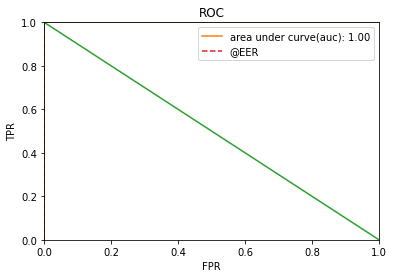

In [20]:
import numpy as np
from sklearn.svm import SVC
import joblib
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

train_feature,train_label = load_feature_label("feature_8k_4_datasets.npy")
plt.plot(train_label)
X_train, X_test, y_train, y_test = train_test_split(train_feature, train_label, test_size = 0.2)#X
model = SVC(kernel='rbf', C=1e3, gamma=0.5, class_weight='balanced', probability=True)
model.fit(X_train, y_train)
joblib.dump(model, "./model2.m")
predict_proba = model.predict_proba(X_train)
predict = model.predict(X_train)
acc,eer,hter = metric(predict_proba,y_train)
print("train acc is:%f eer is:%f hter is:%f"%(acc,eer,hter))

FAR =  0.0
FRR =  0.0
fp =  0
tn =  817
fn =  0
tp =  783
test acc is:1.000000 eer is:0.000000 hter is:0.000000


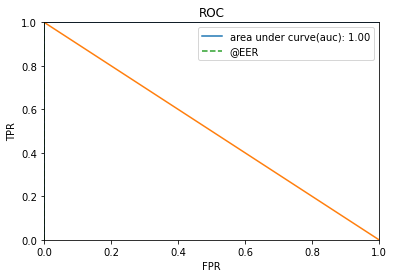

In [22]:
model = joblib.load("./model2.m")
predict_proba = model.predict_proba(X_test)
predict = model.predict(X_test)
acc,eer,hter = metric(predict_proba,y_test)
print("test acc is:%f eer is:%f hter is:%f"%(acc,eer,hter))

In [53]:
### подготовка DF для анализа
import cv2
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
import pickle
from tqdm import tqdm
from scipy.interpolate import griddata

def getSpectrum(x):
    f = np.fft.fft2(x)
    fshift = np.fft.fftshift(f)
    phase_spectrum = np.angle(fshift)
    return phase_spectrum


number_iter = 1600
N = 300
psd1D_total = np.zeros([number_iter*2, N])
label_total = np.zeros([number_iter*2])
data={}
cont = 0
iter_= 0
#fake data
rootdir = 'D:/Dataset/prepro_deepFake/fake/'
feature_label = []
label = 1
for subdir, dirs, files in tqdm(os.walk(rootdir)):
    for file in files:        

        filename = os.path.join(subdir, file)
        
        img = cv2.imread(filename)
        
        # we crop the center
        h = int(img.shape[0]/3)
        w = int(img.shape[1]/3)
        img = img[h:-h,w:-w]
        R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
        imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B

        # Calculate the azimuthally averaged 1D power spectrum
        psd1D = azimuthalAverage(getSpectrum(imgGray))
        
        points = np.linspace(0,N,num=psd1D.size) # coordinates of a
        xi = np.linspace(0,N,num=N) # coordinates for interpolation

        interpolated = griddata(points,psd1D,xi,method='cubic')
        interpolated /= interpolated[0]

        psd1D_total[iter_,:] = interpolated         
        label_total[iter_] = 1
        cont+=1
        iter_+=1
        if cont == number_iter:
            break
    if cont == number_iter:
        break
print(cont)
print('fake done')
## real data
cont = 0
rootdir2 = 'D:/Dataset/prepro_deepFake/real/'

for subdir, dirs, files in tqdm(os.walk(rootdir2)):
    for file in files:        

        filename = os.path.join(subdir, file)
        parts = filename.split("/")
   
        img = cv2.imread(filename)
    
        # we crop the center
        h = int(img.shape[0]/3)
        w = int(img.shape[1]/3)
        img = img[h:-h,w:-w]
        R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
        imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
        psd1D = azimuthalAverage(getSpectrum(imgGray))
        points = np.linspace(0,N,num=psd1D.size) # coordinates of a
        xi = np.linspace(0,N,num=N) # coordinates for interpolation

        interpolated = griddata(points,psd1D,xi,method='cubic')
        interpolated /= interpolated[0]

        psd1D_total[iter_,:] = interpolated         
        label_total[iter_] = 0
        cont+=1
        iter_+=1
        if cont == number_iter:
            break
    if cont == number_iter:
        break
print(cont)
print('real done')
data["data"] = psd1D_total
data["label"] = label_total
output = open('df_feature_3200_psd1D.pkl', 'wb')
pickle.dump(data, output)
output.close()





0it [00:00, ?it/s]C:\Users\ACA8~1\AppData\Local\Temp/ipykernel_14712/2120388866.py:50: RuntimeWarning: divide by zero encountered in true_divide
  interpolated /= interpolated[0]
C:\Users\ACA8~1\AppData\Local\Temp/ipykernel_14712/2120388866.py:50: RuntimeWarning: invalid value encountered in true_divide
  interpolated /= interpolated[0]




5it [00:00, 40.76it/s]



10it [00:00, 39.99it/s]



15it [00:00, 27.50it/s]



19it [00:00, 26.05it/s]



23it [00:00, 27.86it/s]



26it [00:00, 28.13it/s]



29it [00:01, 24.36it/s]



32it [00:01, 25.67it/s]



35it [00:01, 25.14it/s]



38it [00:01, 17.27it/s]



41it [00:01, 18.52it/s]



44it [00:01, 18.01it/s]



47it [00:02, 18.07it/s]



51it [00:02, 22.01it/s]



54it [00:02, 17.86it/s]



57it [00:02, 17.26it/s]



60it [00:02, 16.64it/s]



63it [00:03, 16.45it/s]



66it [00:03, 18.27it/s]



69it [00:03, 19.66it/s]



72it [00:03, 16.02it/s]



74it [00:03, 15.61it/s]



76it [00:03, 15.41it/s]



78it [00:03, 13.72it/s]



80it [

1600
fake done






0it [00:00, ?it/s]C:\Users\ACA8~1\AppData\Local\Temp/ipykernel_14712/2120388866.py:85: RuntimeWarning: divide by zero encountered in true_divide
  interpolated /= interpolated[0]
C:\Users\ACA8~1\AppData\Local\Temp/ipykernel_14712/2120388866.py:85: RuntimeWarning: invalid value encountered in true_divide
  interpolated /= interpolated[0]




3it [00:00, 24.06it/s]



6it [00:00, 21.53it/s]



9it [00:00, 15.21it/s]



12it [00:00, 17.79it/s]



17it [00:00, 24.13it/s]



20it [00:00, 21.04it/s]



23it [00:01, 22.48it/s]



26it [00:01, 22.93it/s]



30it [00:01, 25.07it/s]



33it [00:01, 23.31it/s]



36it [00:01, 22.30it/s]



40it [00:01, 25.21it/s]



43it [00:01, 21.86it/s]



47it [00:02, 22.86it/s]



50it [00:02, 18.11it/s]



53it [00:02, 17.40it/s]



55it [00:02, 14.94it/s]



59it [00:02, 16.58it/s]



62it [00:03, 17.63it/s]



65it [00:03, 19.96it/s]



68it [00:03, 17.92it/s]



70it [00:03, 17.13it/s]



73it [00:03, 18.79it/s]



75it [00:03, 18.42it/s]



77it [00

1600
real done


In [46]:
import cv2
import numpy as np
import os
from os import listdir
from tqdm import tqdm
from skimage import feature as skif
import matplotlib.image as mpimg
from matplotlib import pyplot as plt

def get2DSpectrum(file):
    epsilon = 1e-8
    img = mpimg.imread(file)
    R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
    imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
    f = np.fft.fft2(imgGray)
    fshift = np.fft.fftshift(f)
    fshift+=epsilon
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    return magnitude_spectrum


path = ['D:/Dataset/thispersondoesntexists_10K/', 'D:/Dataset/100KFake_10K/','D:/Dataset/Flickr-Faces-HQ_10K/', 'D:/Dataset/celebA-HQ_10K/']
names = ['thispersondoesntexists','100KFake','Flickr-Faces-HQ','celebA-HQ']
labels = [1,1,0,0]

#number of samples from each dataset
stop = 10000
iter_= 0
data={}
psd1D_total = np.zeros([stop*4, 722])
label_total = np.zeros([stop*4])
feature_label = []
for z in range(4):
    cont = 0
    for filename in tqdm(listdir(path[z])):
        psd1D_total[iter_,:] = azimuthalAverage(get2DSpectrum(path[z]+filename))
        label_total[iter_] = labels[z]
        iter_+=1
        cont+=1
        if cont >= stop:
            break
    print(f"{names[z]} done")

data["data"] = psd1D_total
data["label"] = label_total
output = open('psd1D_40K.pkl', 'wb')
pickle.dump(data, output)
output.close()

100%|████████████████████████████████████████████████████████████████████████████▉| 9999/10000 [47:47<00:00,  3.49it/s]


thispersondoesntexists done


100%|████████████████████████████████████████████████████████████████████████████▉| 9999/10000 [41:04<00:00,  4.06it/s]


100KFake done


100%|████████████████████████████████████████████████████████████████████████████▉| 9999/10000 [39:47<00:00,  4.19it/s]


Flickr-Faces-HQ done


100%|████████████████████████████████████████████████████████████████████████████▉| 9999/10000 [39:12<00:00,  4.25it/s]


celebA-HQ done


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import log10, sqrt


def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def AWGN(img):
    height, width, channels = img.shape
    gauss = np.random.normal(0,0.1,img.size)
    gauss = gauss.reshape(height,width,channels).astype('uint8')
    # Add the Gaussian noise to the image
    img_gauss = cv2.add(img,gauss)
    return img_gauss, PSNR(img,img_gauss)

img = cv2.imread('fake.png')
gauss, psnr = AWGN(img)
cv2.imshow('a',gauss)
cv2.waitKey(0)
print(psnr)

100
